In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_curve, roc_auc_score, r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score, KFold, LeaveOneOut


from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, Lasso

### Scenario-3: Baseball Players
    Salaries of Major League Baseball players who played at least one game in seasons of 1991 and 1992. 

    Performance measures are were taken along with four categorical variables which indicates how free each 
    player was to move to other teams. The data collected does not contain any information on pitchers. 
    The task is to find the salary of a baseball player based on the features given. 
    
    Dataset Description: 
    • Batting_average: float64 [0.063,0.457]
    • Walks: float64 [0, 138]
    • On-base_percentage: int64 [0.063,0.486]
    • Strike-Outs: int64 [1,175]
    • Runs: int64 [0, 133]
    • Stolen_bases: int64 [0, 76]
    • Hits: int64 [1,216]
    • Errors: int64 [0,31]
    • Doubles: int64 [0,49]
    • Free_agency_eligibility: int64 [0, 1]
    • Triples: int64 [0, 15]
    • Free_agent: int64 [0, 1]
    • HomeRuns: int64 [0,44]
    • Arbitration_eligibility: int64 [0, 1]
    • Runs_batted_in: int64 [0, 133]
    • Arbitration: int64 [0,1]
    • Salary: int64 [109,6100]
    
    Tasks to be Performed: 
    • Read the dataset with no headers; Then put respective columns names and find the correlation between
    the features - Beginner
    • Fit a Linear Regression model by applying 5-fold cross validation using scikit and calculate the scores
    and average accuracy - Intermediate
    • Fit a Linear Regression model by applying 5-fold cross validation explicitly using KFold scikit and
    calculate the scores using mean absolute error as scoring parameter - Advanced
    • Using LOOCV fit a Linear Regression model and calculate the average score using mean absolute error
    as scoring parameter Advanced
    • Apply Lasso Regression over the model and find r2_score and MAE - Beginner
    
    Topics Covered: 
    • Cross Validation
    • Linear Regression
    • KFold
    • Leave One Out CV
    • Lasso Regression


In [2]:
df = pd.read_csv('baseball.csv', names = ['Batting_average',
                                          'Walks',
                                          'On-base_percentage',
                                          'Strike-Outs',
                                          'Runs',
                                          'Stolen_bases',
                                          'Hits',
                                          'Errors',
                                          'Doubles',
                                          'Free_agency_eligibility',
                                          'Triples',
                                          'Free_agent',
                                          'HomeRuns',
                                          'Arbitration_eligibility',
                                          'Runs_batted_in',
                                          'Arbitration',
                                          'Salary'], header=None)
df.head()

,Batting_average,Walks,On-base_percentage,Strike-Outs,Runs,Stolen_bases,Hits,Errors,Doubles,Free_agency_eligibility,Triples,Free_agent,HomeRuns,Arbitration_eligibility,Runs_batted_in,Arbitration,Salary
0,0.271,0.328,74,161,22,6,12,58,49,133,23,17,1,1,0,0,109
1,0.264,0.318,24,48,7,0,1,22,15,18,0,7,0,0,0,0,160
2,0.251,0.338,101,141,35,3,32,105,71,104,34,6,0,0,1,0,2700
3,0.224,0.274,28,94,21,1,1,44,27,54,2,7,1,1,0,0,550
4,0.206,0.262,14,51,18,1,1,28,17,26,0,3,1,1,0,0,300


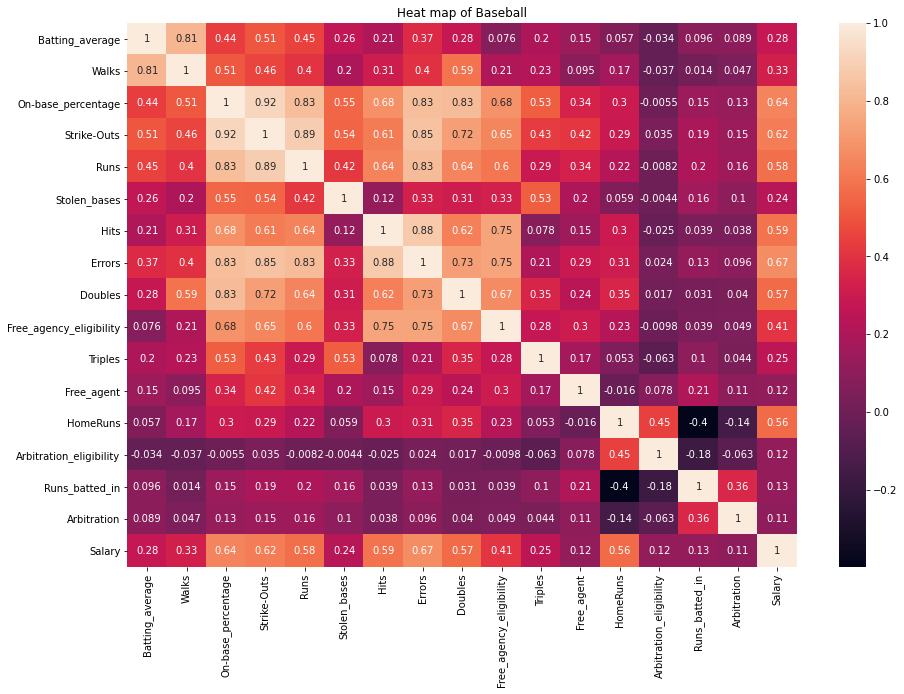

In [3]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True)
plt.title('Heat map of Baseball')
plt.show()

In [4]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

In [5]:
model = LinearRegression()
scores = cross_val_score(model, X, y, cv=5)

In [6]:
scores

array([0.61307717, 0.71432981, 0.66861868, 0.65218121, 0.51968405])

In [7]:
k_fold = KFold(n_splits=5)
scores = cross_val_score(model, X, y, cv=k_fold, scoring='neg_mean_absolute_error')
scores

array([-552.5000243 , -558.36629299, -547.60289655, -529.93113452,
       -509.43522433])

In [8]:
loo = LeaveOneOut()
loo.get_n_splits(X)
scores=[]
for train_index, test_index in loo.split(X):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index,:]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    scores.append(mean_absolute_error(y_test, y_pred))

In [9]:
np.mean(scores)

539.1166111675851

In [11]:
loo = LeaveOneOut()
loo.get_n_splits(X)
scores=[]
for train_index, test_index in loo.split(X):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index,:]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    model = Lasso()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    scores.append(mean_absolute_error(y_test, y_pred))

In [12]:
np.mean(scores)

541.6336999411672